In [1]:
#Analyzing data using statistical distributions
#Import libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [5]:
#get dataset
data=pd.read_csv('office_supply.csv')

In [6]:
#take a look at the data
data[:10]

,Customer Number,Service Level,Campaign Period Sales,Date of Last Transaction,Date of First Purchase,Number of Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,...,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,2074199,Standard,$107.16,9/11/15,8/1/65,20,False,False,False,NOTICE,...,N,N,N,N,N,N,N,Y,5-Jan,English
1,30376164,Premier,$110.66,2/26/15,1/15/26,2,False,False,False,NOTICE,...,N,N,N,N,N,N,N,N,5-Jan,NaN
2,16464340,Premier,"$4,697.62",1/9/03,9/15/63,12,False,True,False,NOTICE,...,Y,N,N,N,N,N,Y,Y,,NaN
3,6471170,Premier,$103.08,6/23/16,1/15/86,9,False,False,False,AUTO RENEW,...,N,N,N,N,N,N,Y,Y,5-Jan,English
4,56184607,Premier,($566.50),6/6/17,10/31/14,1,True,True,True,NOTICE,...,N,N,N,N,N,N,N,N,,NaN
5,14301160,Premier,$35.12,11/17/17,4/1/51,18,False,False,False,NOTICE,...,Y,N,N,Y,N,N,N,Y,5-Jan,English
6,1809494,Premier,"$1,777.20",5/19/15,7/15/48,11,False,False,False,NOTICE,...,Y,N,N,N,N,N,N,N,,NaN
7,27878500,Premier,"$1,006.33",6/10/16,12/15/46,1,False,True,False,NOTICE,...,N,N,N,N,N,N,N,N,,NaN
8,49396865,Premier,"$2,572.96",1/1/15,5/15/53,6,False,False,False,AUTO RENEW,...,Y,N,N,N,N,Y,N,N,,NaN
9,23849132,Premier,($421.83),10/2/17,5/15/66,3,True,True,True,NOTICE,...,N,N,N,N,N,N,N,N,,NaN


In [7]:
#let's take a look at the column names
data.columns

Index(['Customer Number', 'Service Level', ' Campaign Period Sales ',
       ' Date of Last Transaction ', 'Date of First Purchase',
       'Number of Transactions', 'Do Not Direct Mail Solicit', 'Do Not Email',
       'Do Not Telemarket', 'Repurchase Method', 'Last Transaction Channel',
       'Email Available', 'Desk', 'Executive Chair', 'Standard Chair',
       'Monitor', 'Printer', 'Computer', 'Insurance', 'Toner',
       'Office Supplies', 'Number of Employees', 'Language'],
      dtype='object')

In [8]:
#now lets make the column names lowercase and remove the spaces
data.columns=[col.strip().replace(' ', '_').lower() for col in data.columns]

In [9]:
data.columns

Index(['customer_number', 'service_level', 'campaign_period_sales',
       'date_of_last_transaction', 'date_of_first_purchase',
       'number_of_transactions', 'do_not_direct_mail_solicit', 'do_not_email',
       'do_not_telemarket', 'repurchase_method', 'last_transaction_channel',
       'email_available', 'desk', 'executive_chair', 'standard_chair',
       'monitor', 'printer', 'computer', 'insurance', 'toner',
       'office_supplies', 'number_of_employees', 'language'],
      dtype='object')

In [10]:
#now that our columns are ready for analysis, let's extract that necessary columns for our analysis 
data=data[['campaign_period_sales','number_of_transactions']]

In [11]:
data.head()

,campaign_period_sales,number_of_transactions
0,$107.16,20
1,$110.66,2
2,"$4,697.62",12
3,$103.08,9
4,($566.50),1


In [12]:
#we notice from viewing the data that sales data is not numeric and also negative values are within parentheses. 
#let's use regular expressions to fix this, by first making a column for negative values
data['neg']=data.campaign_period_sales.str.contains('(',regex=False).values
data['neg']=data['neg'].map({False:1,True:-1})

In [13]:
#now let's look at that negavive value column
data.head()

,campaign_period_sales,number_of_transactions,neg
0,$107.16,20,1
1,$110.66,2,1
2,"$4,697.62",12,1
3,$103.08,9,1
4,($566.50),1,-1


In [14]:
#let's change take out the parentheses and replace with a negative value
data['campaign_period_sales']=data['campaign_period_sales'].str.extract(r'([\d,]+.\d+)',expand=False).str.replace(',','').astype(float)
data['campaign_period_sales']=data['campaign_period_sales']*data['neg']

In [15]:
data.head()

,campaign_period_sales,number_of_transactions,neg
0,107.16,20,1
1,110.66,2,1
2,4697.62,12,1
3,103.08,9,1
4,-566.50,1,-1


In [16]:
#ok our data looks good, so we can remove the neg column
data.drop(['neg'], axis='columns', inplace=True)

In [17]:
data.head()

,campaign_period_sales,number_of_transactions
0,107.16,20
1,110.66,2
2,4697.62,12
3,103.08,9
4,-566.50,1


In [18]:
#now lets shorten the column names
data.rename(columns={'campaign_period_sales':'sales','number_of_transactions':'transactions'},inplace=True)

In [19]:
data.head()

,sales,transactions
0,107.16,20
1,110.66,2
2,4697.62,12
3,103.08,9
4,-566.50,1


In [20]:
#the data is properly formatted, so let's look at some statistics on the data
data.describe()

,sales,transactions
count,46407.000000,46407.000000
mean,999.040725,13.591075
std,1186.011301,7.451356
min,-919.830000,1.000000
25%,280.590000,7.000000
50%,446.670000,15.000000
75%,1236.900000,19.000000
max,11069.760000,66.000000


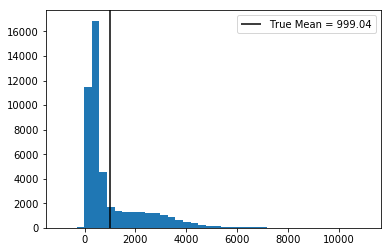

In [21]:
#now lets visualize the pop mean 
plt. hist(data['sales'], bins = 40)
plt.ylim(*plt.ylim())
plt.vlines(np.mean(data['sales']), *plt.ylim(), label = "True Mean = " + str(round(np.mean(data['sales']),2)))
plt.legend();

In [22]:
#we see from the summary stastics that the population mean for sales is approximately 1000. 
#let's take samples from this dataset and see if we can approxiamte the pop mean using samples
sample_means=[]
for i in range(10000):
    sample=np.random.choice(data['sales'],size=100,replace=False)
    sample_means.append(np.mean(sample))
print('Sample Means: ', sample_means[:5], '\n')

Sample Means:  [1058.2409, 1128.8107, 928.8407, 1072.1818000000003, 889.7621000000003] 



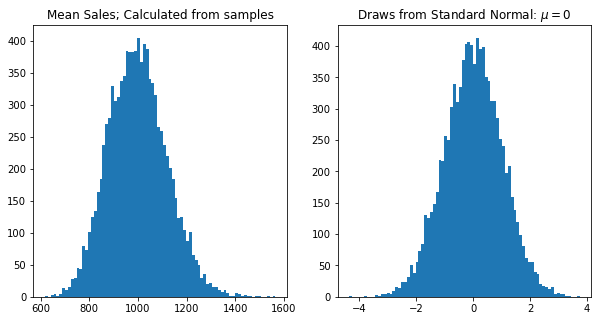

In [23]:
#from the sample means we can see that values are approximately 1000 falling either a little bit above or below
#let's now get a visualization of these sample means and compare it to a standard normal distribution 
_, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.hist(sample_means,bins=80)
ax1.set_title('Mean Sales; Calculated from samples');
ax2.hist(np.random.normal(size=10000),bins=80)
ax2.set_title('Draws from Standard Normal: $\mu=0$');

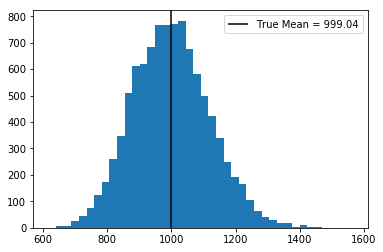

In [24]:
#let's visualize where the pop mean falls within the sample means
plt.hist(sample_means, bins = 40)
plt.ylim(*plt.ylim())
plt.vlines(np.mean(data['sales']), *plt.ylim(), label = "True Mean = " + str(round(np.mean(data['sales']),2)))
plt.legend();

In [25]:
#now we would like to see the number of negative sales from the data and also the number of sales at which the company
#breaks-even given a break-even sales amount of $250
sales=data['sales']
print('Total non-negative sales: ', len(sales[sales>=0]))
print('Ratio of non-negative sales: ', len(sales[sales>=0])/len(sales))

Total non-negative sales:  46368
Ratio of non-negative sales:  0.9991596095416639


In [26]:
#from the above calculation we can see that the ratio of non-negative sales is considerably low at .99 so less than 1% of total sales
#now let's look at the number of break-even sales figures
print('Total break-even sales: ', len(sales[sales>=250]))
print('Ratio of break-even sales: ', len(sales[sales>=250])/len(sales))

Total break-even sales:  37356
Ratio of break-even sales:  0.8049647682461698


Value of pmf for 0 (failure):  0.19999999999999998 
Value of pmf for 1 (success): 0.8


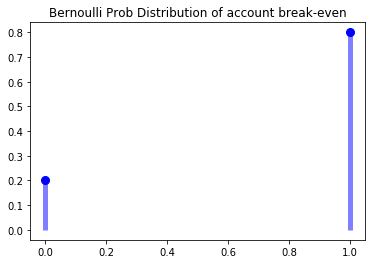

In [27]:
#from this calculation the break-even estimate is approximately .8 
#so the probablity of a random sale breaking-even is .8 which is considerably high
#let's visualize this probability using a Bernoulli Distribution 

p = 0.8  # Rough probability of an account breaking even

print("Value of pmf for 0 (failure): ", stats.bernoulli.pmf(0,p),
     "\nValue of pmf for 1 (success):", stats.bernoulli.pmf(1,p)) # Print out values

plt.plot(0, stats.bernoulli.pmf(0, p), 'bo', ms=8) # Plot a point
plt.vlines(0, 0, stats.bernoulli.pmf(0, p), colors='b', lw=5, alpha=0.5) # Plot line going up to that point

plt.plot(1, stats.bernoulli.pmf(1, p), 'bo', ms=8) # Plot a point
plt.vlines(1, 0, stats.bernoulli.pmf(1, p), colors='b', lw=5, alpha=0.5) # Plot line going up to that point
plt.title("Bernoulli Prob Distribution of account break-even");

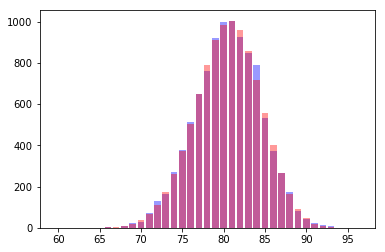

In [28]:
#now let's compute a binomial distribution and visualize it 
#the below cell will create two over-lapping bar-graphs. One, in blue, will be our observed binomial distribution, taken from the office data. 
#in red will be the actual pmf of a binomial distribution parameterized by p = ~.801 and n = 100 (multiplied by 10,000).
bin_sample = []

# Run code 10000 times
for i in range(10000):
    # Take 100 samples from "sales"
    sample = np.random.choice(data['sales'], size = 100, replace = True)
    
    # Only keep observations greater than 250
    break_even = [s for s in sample if s >=250]
    
    # Count remaining observations
    bin_sample.append(len(break_even))
    
# Counting up the instances of each number of successes for the bar plot.
bin_sample_counts = pd.Series(bin_sample).value_counts()
plt.bar(bin_sample_counts.index, bin_sample_counts, color = "blue", alpha = .4)

# Creating the binomial data, such that it looks the same as our "observed" data
binom_pmf = {}
for i in range(60,96):
    binom_pmf[i] = stats.binom.pmf(i,100,len(sales[sales>=250])/len(sales),  )*10000
    
binom_pmf_ser=pd.Series(binom_pmf)

plt.bar(binom_pmf_ser.index, binom_pmf_ser, color = "red", alpha = .4);